# Analysis Tool

### {notes on how to run go here}

In [1]:
# Import Python Libraries
import numpy as np
import jax      # PIP JAX install - Search for the windows [cpu] version
import jaxlib
import jax.numpy as jnp
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpyro
import numpyro.distributions as dist
from pathlib import Path
import scipy.stats as stats

In [2]:
# Figure Parameters Reset to default
def fig_reset():
    style.use('default')  # Clear any custom styles that might have been applied
    plt.close('all')  # Clear any active figures
    plt.set_cmap('viridis')  # Reset default colormaps
    plt.rcParams.update(plt.rcParamsDefault)  # Clear any manually set default figure or axes properties
    plt.ioff()  # Reset interactive mode
    mpl.rcdefaults()  # Reset all rcParams to default values
    mpl.rcParams.update(mpl.rcParamsDefault)  # Additional resets for completeness

fig_reset() # Reset MATPLOTLIB parameters to default

# Colors
color_in = 'red'
color_mid = 'green'
color_out = 'blue'
color_by_num = ['crimson', 'orange', 'goldenrod', 'green', 'skyblue', 'darkorchid']
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'orchid']

# Color pallette
α = .5
ß = 0.25
line_width = 1.5
full_line_sty = [':', '--', '-', '-.']
full_marker_pal = ['o','x','^','s','P','H','*']
full_color_pal = ['red', 'orange', 'gold', 'green', 'b', 'darkorchid', 'chocolate', 'deeppink', 'cyan', 'darkcyan', 'black']
full_color_pal_disk = ['dimgrey', 'b', 'limegreen', 'firebrick', 'gold', 'orchid', 'chocolate', 'deeppink', 'cyan', 'darkcyan', 'black']


<Figure size 640x480 with 0 Axes>

In [3]:
# # Generate Settled Models Database

#     # test for settled model
#         # if Ture, move model into Settled_Models folder
# from pathlib import Path

# settle_test = Path("Unverified_Models")
# for folder in settle_test.iterdir():
#     if folder.is_dir() and (folder / "polyout.txt").exists():
#         print(f"Found: {folder / 'polyout.txt'}")
    

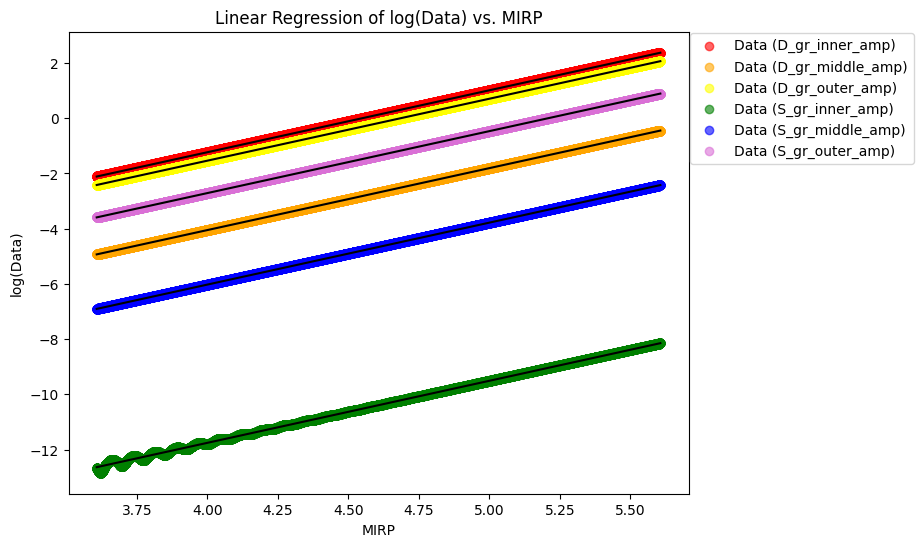

Slope for D_gr_inner_amp (color: red): 2.24196787
Slope for D_gr_middle_amp (color: orange): 2.24196756
Slope for D_gr_outer_amp (color: yellow): 2.24196742
Slope for S_gr_inner_amp (color: green): 2.24546827
Slope for S_gr_middle_amp (color: blue): 2.24196709
Slope for S_gr_outer_amp (color: orchid): 2.24196716


In [14]:
# Load data, Star is from fort.22, Disk is from fort.23
col_name_1 = ['MIRP', 'S_gr_inner_amp', 'S_gr_inner_phase', 'S_gr_middle_amp', 'S_gr_middle_phase', 'S_gr_outer_amp', 'S_gr_outer_phase']
col_name_2 = ['MIRP', 'D_gr_inner_amp', 'D_gr_inner_phase', 'D_gr_middle_amp', 'D_gr_middle_phase', 'D_gr_outer_amp', 'D_gr_outer_phase']

df1 = pd.read_csv("fort.22", names=col_name_1, header=None, sep='\s+')
df2 = pd.read_csv("fort.23", names=col_name_2, header=None, sep='\s+')

# Merge the dataframes on the 'MIRP' column
df = pd.merge(df1, df2, on="MIRP", suffixes=('_disk', '_star'))

# Drop all columns that end with 'phase'
df = df.drop(columns=df.filter(regex='phase$').columns)

# Ensure that MIRP is numeric
df["MIRP"] = pd.to_numeric(df["MIRP"], errors="coerce")

# Define the range for regression
last_MIRP = df['MIRP'].iloc[-1]
MIRP_threshold = last_MIRP - 2.0

# Filter the data for the last 2 time units
df_subset = df[df['MIRP'] >= MIRP_threshold]

# Plotting the data and the regression lines
plt.figure(figsize=(8, 6))

# List of columns to process
columns = ['D_gr_inner_amp', 'D_gr_middle_amp', 'D_gr_outer_amp', 
           'S_gr_inner_amp', 'S_gr_middle_amp', 'S_gr_outer_amp']

# Simple colors to use
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'orchid']

# Store slopes for each column
slopes = {}

# Loop through each column and perform regression
for idx, column in enumerate(columns):
    # Apply log transformation to the y-axis
    df_subset = df_subset.copy()  # Avoid SettingWithCopyWarning
    df_subset[f'log_{column}'] = np.log10(df_subset[column])

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_subset['MIRP'], df_subset[f'log_{column}'])

    # Store the slope in the dictionary
    slopes[column] = slope
    color = colors[idx]  # Get the color from the list

    # Plot the original data (log-transformed)
    plt.scatter(df_subset['MIRP'], df_subset[f'log_{column}'], label=f'Data ({column})', alpha=0.6, color=color)

    # Plot the regression line
    regression_line = slope * df_subset['MIRP'] + intercept
    plt.plot(df_subset['MIRP'], regression_line, label=None, color='black')

# Adding labels and title
plt.xlabel('MIRP')
plt.ylabel('log(Data)')
plt.title('Linear Regression of log(Data) vs. MIRP')

# Displaying the legend outside of the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), borderaxespad=0.1)

# Show the plot
plt.show()

# Print out the slopes for each column with the color used
for idx, (column, slope) in enumerate(slopes.items()):
    color = colors[idx]  # Get the color used in the plot
    print(f"Slope for {column} (color: {color}): {slope:.8f}")

